# K-means Clustering

### Import resources and display image

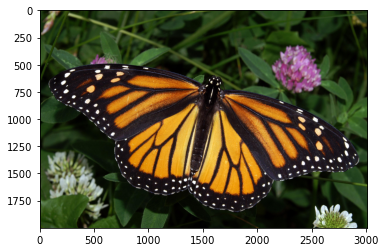

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))   # turns out to be (6016000, 3)

# Convert to float type
pixel_vals = np.float32(pixel_vals)  # turns out to be floated values for this (6016000, 3) matrix
# NOw data is amenable for k-means 

### Implement k-means clustering

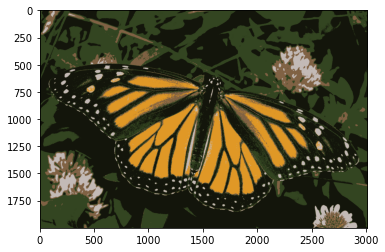

In [3]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) # both criteria which ever fullfils first enables to stop iterations further

## TODO: Select a value for k
# then perform k-means clustering
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)# 10 is number of attempts

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))       # for converting the segmentation results into image form
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

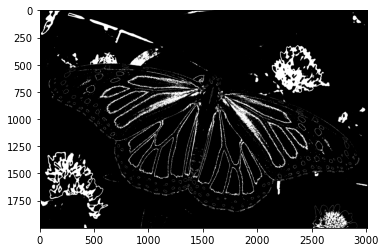

In [4]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==4, cmap='gray')

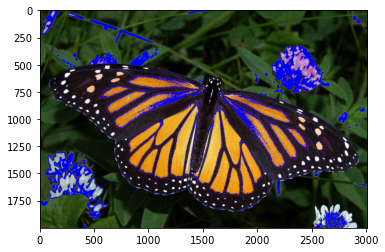

In [5]:
# mask an image segment by cluster

cluster = 4 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 0, 255] # this makes segments as blue color

plt.imshow(masked_image)

# Remarks/My learning:


- The label indices run from 0 to 4, since 5 clusters exist
- what would happens if label index is 5?
    - (a) NOT segment anything 
    - (b) show an error message

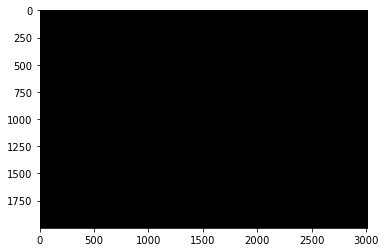

In [6]:
# bingo as expected option (a) 
plt.imshow(labels_reshape==5, cmap='gray')

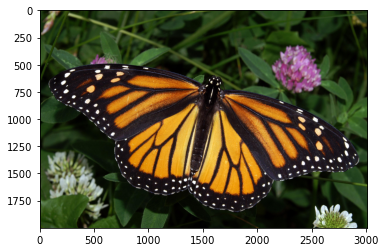

In [7]:
# mask an image segment by cluster

cluster = 5 

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 0, 255] # this makes segments as blue color

plt.imshow(masked_image)

**Let us segment another cluster with label index k = 3**

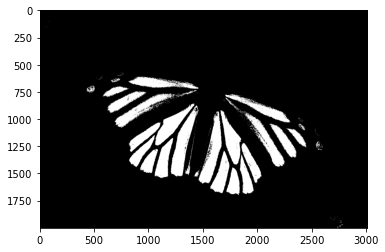

In [8]:
# Let us which part of the image segments using label index of 3
plt.imshow(labels_reshape==3, cmap='gray')

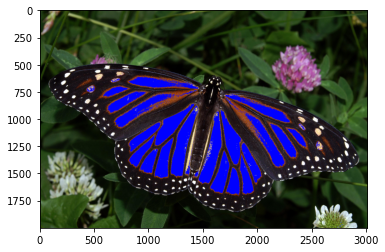

In [9]:
cluster = 3 

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 0, 255] # this makes segments as blue color

plt.imshow(masked_image)

### Note: Segmented regions are mutually exclusive (spatially) as expected

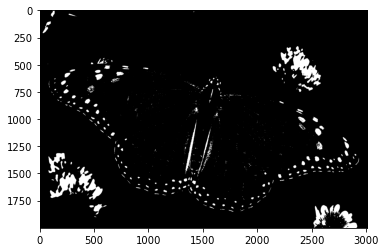

In [16]:
# Let us which part of the image segments using label index of 2
im2 = plt.imshow(labels_reshape==2, cmap='gray')

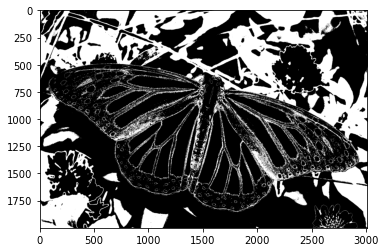

In [21]:
im1 = plt.imshow(labels_reshape==1, cmap='gray')

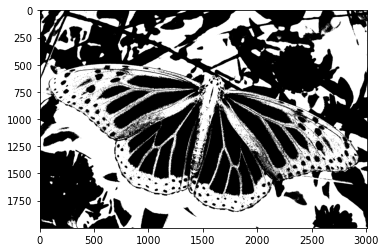

In [15]:
im0 = plt.imshow(labels_reshape==0, cmap='gray')
